In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_full = pd.read_csv('Decisiontreefeature.csv')

In [3]:
bank_full_labels = pd.read_csv('Decisiontreelabel.csv')

In [4]:
bank_full.head()

,age,balance,duration,campaign,pdays,housing_cat,poutcome_success
0,59,2343,1042,1,10000,1,0
1,56,45,1467,1,10000,0,0
2,41,1270,1389,1,10000,1,0
3,55,2476,579,1,10000,1,0
4,54,184,673,2,10000,0,0


In [5]:
#Packages for decision trees
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus

In [6]:
data_train,data_test,label_train,label_test = train_test_split(bank_full, bank_full_labels, test_size=0.2, random_state = 6)

[Text(167.4, 181.2, 'X[2] <= 203.5\nentropy = 0.997\nsamples = 8929\nvalue = [4734, 4195]'),
 Text(83.7, 108.72, 'X[6] <= 0.5\nentropy = 0.727\nsamples = 3584\nvalue = [2858, 726]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.639\nsamples = 3355\nvalue = [2812, 543]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.724\nsamples = 229\nvalue = [46, 183]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 472.5\nentropy = 0.935\nsamples = 5345\nvalue = [1876, 3469]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.999\nsamples = 2995\nvalue = [1431, 1564]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.7\nsamples = 2350\nvalue = [445, 1905]')]

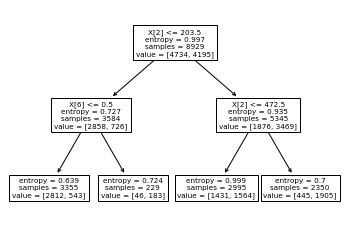

In [7]:
#Fitting decision tree
dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt2.fit(data_train,label_train)
dt2.predict(data_test)

tree.plot_tree(dt2)

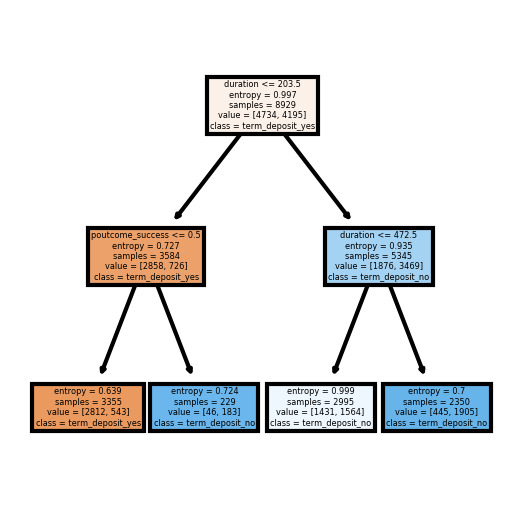

In [8]:
#Decision tree preparation
fn = list(bank_full.columns)
cn = ['term_deposit_yes','term_deposit_no']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

tree.plot_tree(dt2,feature_names = fn,class_names=cn,filled = True)

fig.savefig('imagename.png')

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


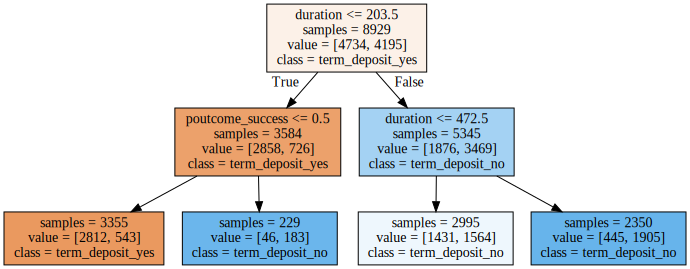

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
import graphviz
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=bank_full.columns, impurity=False, filled=True, class_names=['term_deposit_yes','term_deposit_no'])
graph = graphviz.Source(dot_data)
graph

In [10]:
dt2 = tree.DecisionTreeClassifier(max_depth=3)
dt2.fit(data_train,label_train)

dt2_score_train = dt2.score(data_train,label_train)
print(dt2_score_train)

dt2_score_test = dt2.score(data_test,label_test)
print(dt2_score_test)

0.7550677567476761
0.7586206896551724


In [11]:
dt4 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=6)
dt4.fit(data_train,label_train)

dt4_score_train = dt4.score(data_train,label_train)
print(dt4_score_train)

dt4_score_test = dt4.score(data_test,label_test)
print(dt4_score_test)

0.7842983536790235
0.7984773846842812


In [12]:
dt_full = tree.DecisionTreeClassifier(criterion='entropy',random_state=6)
dt_full.fit(data_train, label_train)

dt_full_score_train = dt_full.score(data_train,label_train)
print(dt_full_score_train)

dt_full_score_test = dt_full.score(data_test,label_test)
print(dt_full_score_test)

1.0
0.7344379758172862


In [13]:
dt_msl = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100)
dt_msl.fit(data_train,label_train)

dt_msl_score_train = dt_msl.score(data_train,label_train)
print(dt_msl_score_train)

dt_msl_score_test = dt_msl.score(data_test,label_test)
print(dt_msl_score_test)

0.8102811065068877
0.812360053739364


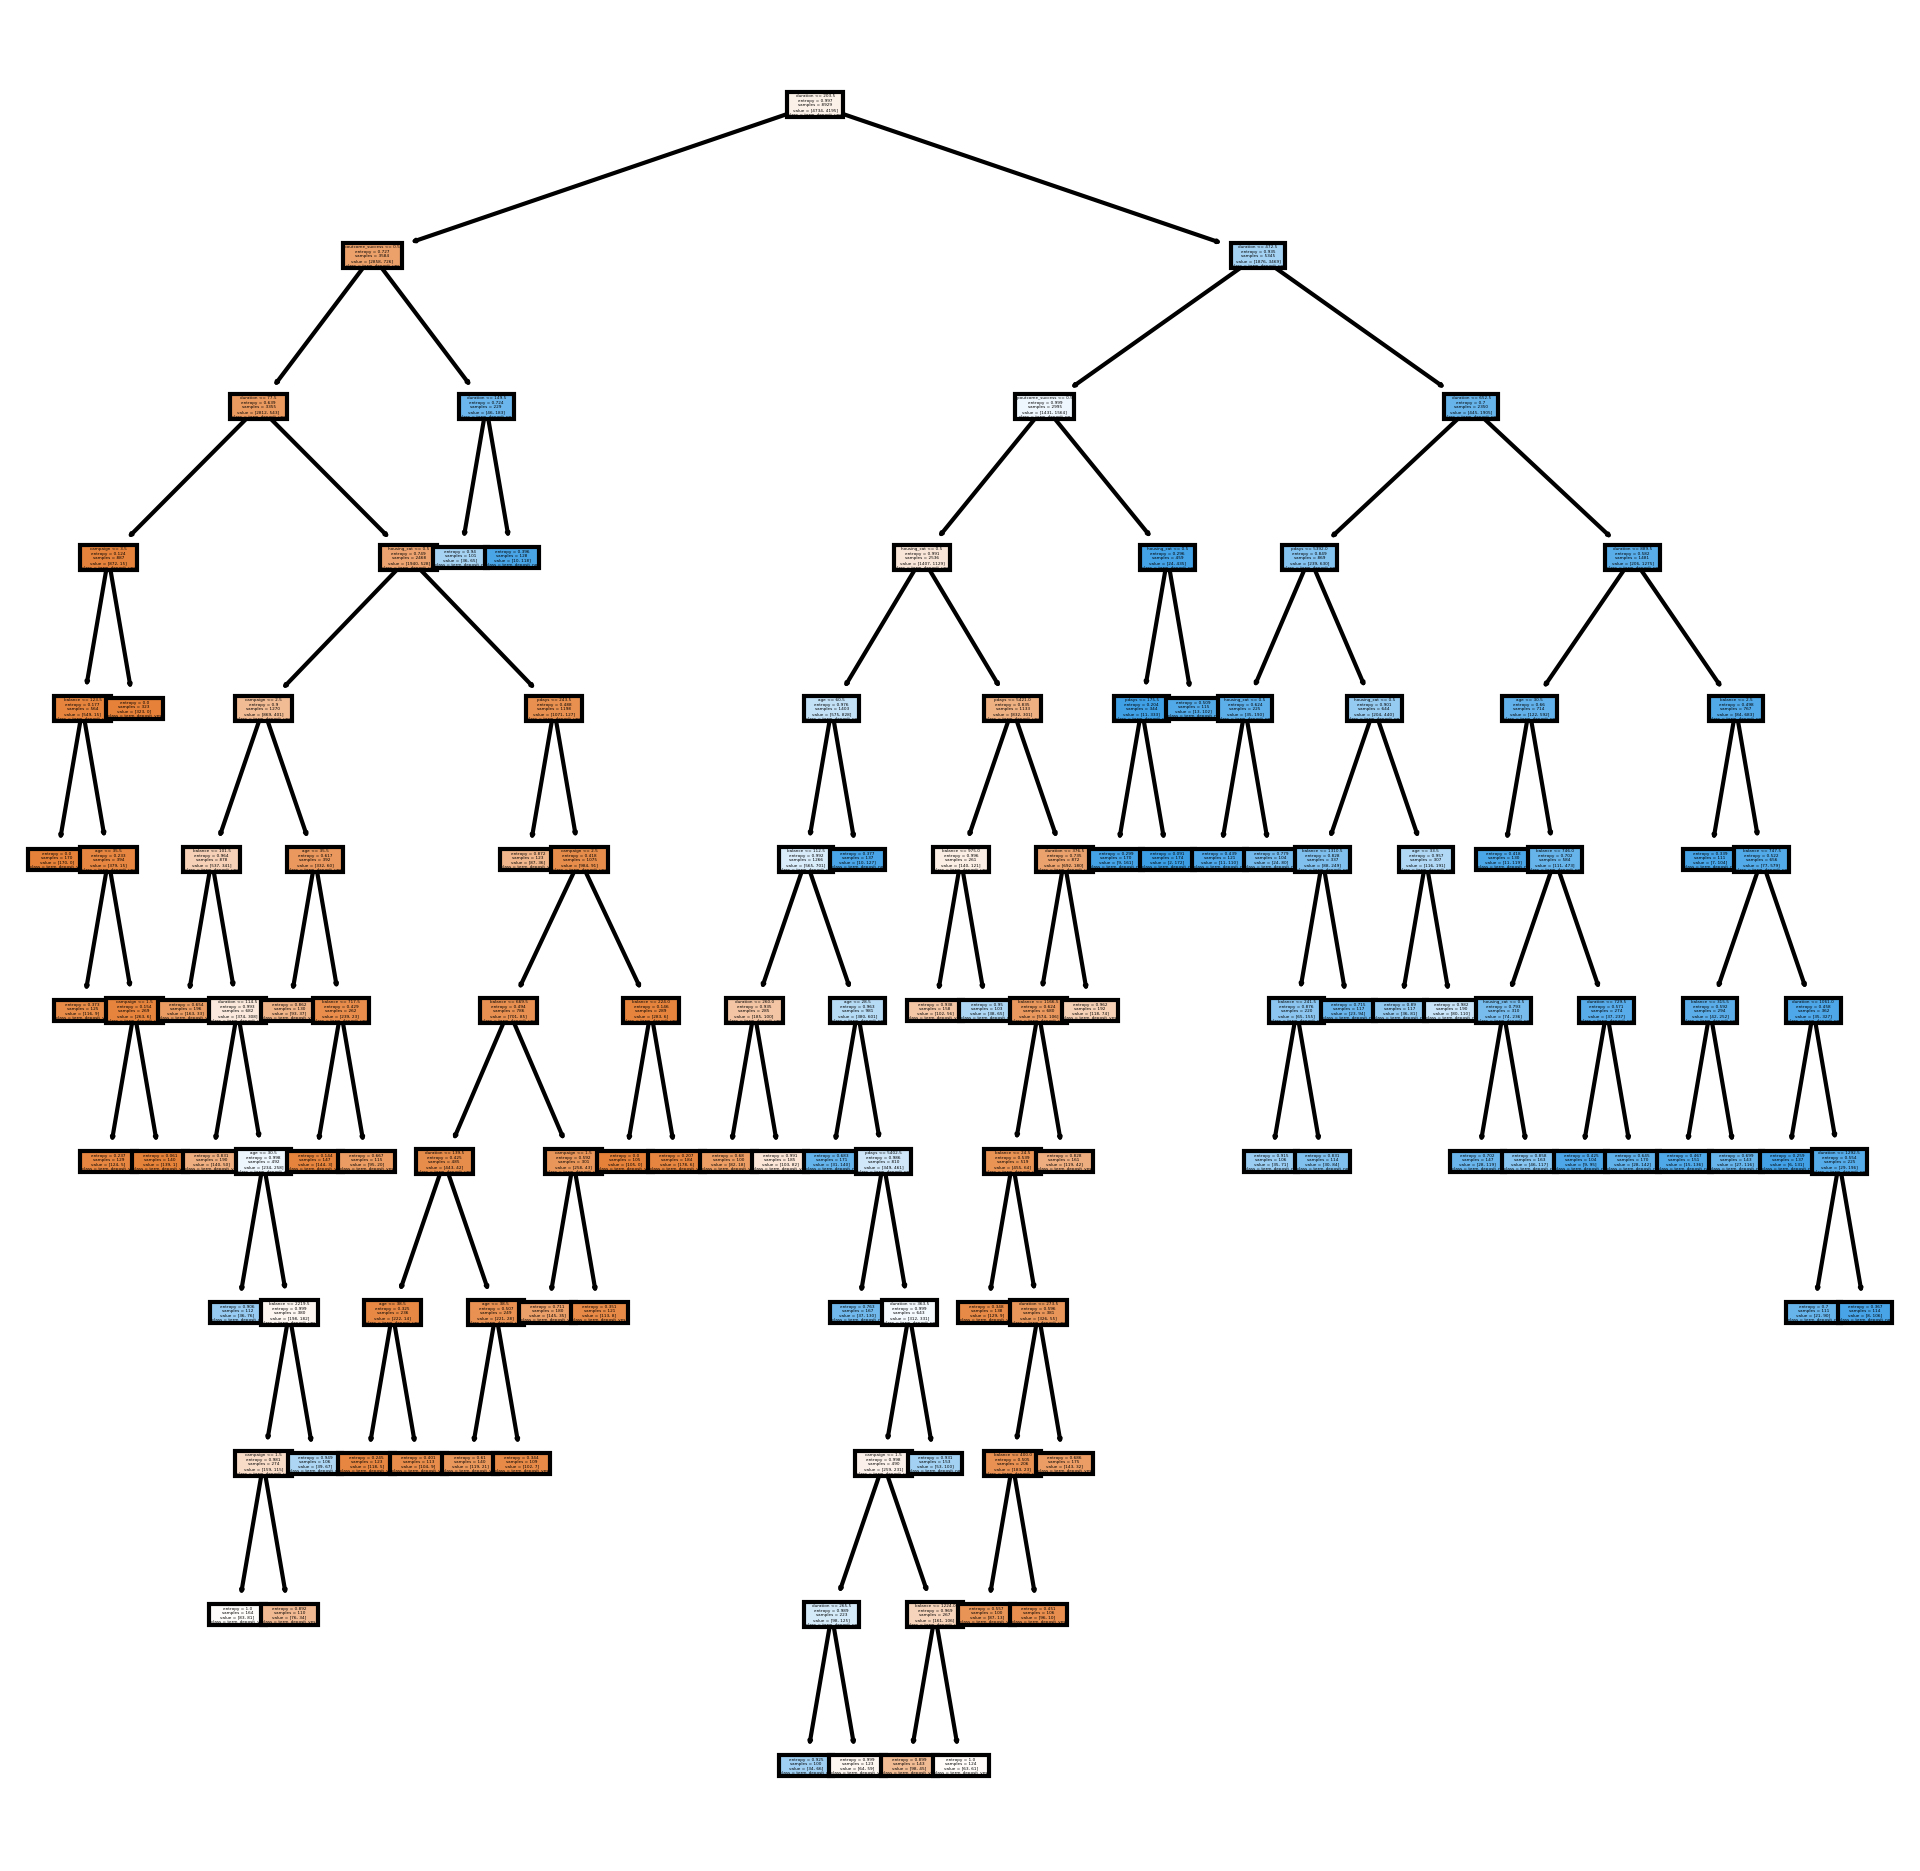

In [14]:
fn = list(bank_full.columns)
cn = ['term_deposit_yes','term_deposit_no']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)

tree.plot_tree(dt_msl,feature_names = fn,class_names=cn,filled = True)

fig.savefig('imagename1.png')